# Back Propagation Neural Network Accelerometer Data

## Case 1

In [ ]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2024-11-08 08:46:47.467449: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 08:46:47.898186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 08:46:48.035293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 08:46:48.074736: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 08:46:48.376952: I tensorflow/core/platform/cpu_feature_guar

In [2]:
dataset = pd.read_csv('./accelerometer_data.csv')
dataset.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


### a. Memilih 15 fitur penting dan terapkan normalisasi 

In [ ]:
features = dataset.drop(columns=['Activity'])
label = dataset['Activity']

# Melakukan pemilihan 15 fitur penting menggunakan Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(features, label)

feature_importances = pd.Series(rf.feature_importances_, index=features.columns)
selected_features = feature_importances.nlargest(15).index.tolist()

# Menambahkan kolom label sebagai target variabel di filtered dataset
selected_features.append('Activity')

filtered_dataset = dataset[selected_features]
filtered_dataset.head()

,tGravityAcc-mean()-X,tGravityAcc-max()-X,tGravityAcc-min()-X,"angle(X,gravityMean)",tGravityAcc-energy()-X,tGravityAcc-max()-Y,"angle(Y,gravityMean)",tGravityAcc-mean()-Y,tGravityAcc-min()-Y,fBodyAccMag-mad(),tGravityAcc-energy()-Y,fBodyAccMag-std(),"tGravityAcc-arCoeff()-Y,2",fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-iqr(),Activity
0,0.936489,0.906083,0.944461,-0.720009,0.829297,-0.279244,0.276801,-0.282719,-0.262160,-0.726707,-0.864621,-0.711074,0.781314,-0.895061,-0.921477,STANDING
1,0.927404,0.856176,0.944461,-0.698091,0.805575,-0.304870,0.281343,-0.289215,-0.262160,-0.960680,-0.858163,-0.959746,0.733171,-0.945437,-0.957178,STANDING
2,0.929915,0.856269,0.948704,-0.702771,0.812044,-0.304870,0.280083,-0.287513,-0.261661,-0.977176,-0.859947,-0.983784,0.168700,-0.971069,-0.978222,STANDING
3,0.928881,0.856269,0.947309,-0.698954,0.809379,-0.305101,0.284114,-0.293396,-0.272916,-0.976796,-0.853713,-0.982120,0.176241,-0.971655,-0.980365,STANDING
4,0.926600,0.853942,0.946221,-0.692245,0.803500,-0.312552,0.290722,-0.302961,-0.279190,-0.975706,-0.843378,-0.978838,0.462677,-0.987489,-0.989996,STANDING


In [4]:
filtered_dataset.dtypes

tGravityAcc-mean()-X         float64
tGravityAcc-max()-X          float64
tGravityAcc-min()-X          float64
angle(X,gravityMean)         float64
tGravityAcc-energy()-X       float64
tGravityAcc-max()-Y          float64
angle(Y,gravityMean)         float64
tGravityAcc-mean()-Y         float64
tGravityAcc-min()-Y          float64
fBodyAccMag-mad()            float64
tGravityAcc-energy()-Y       float64
fBodyAccMag-std()            float64
tGravityAcc-arCoeff()-Y,2    float64
fBodyBodyAccJerkMag-sma()    float64
fBodyBodyAccJerkMag-iqr()    float64
Activity                      object
dtype: object

In [5]:
print("Jumlah nilai null per kolom:\n", filtered_dataset.isnull().sum())

Jumlah nilai null per kolom:
 tGravityAcc-mean()-X         0
tGravityAcc-max()-X          0
tGravityAcc-min()-X          0
angle(X,gravityMean)         0
tGravityAcc-energy()-X       0
tGravityAcc-max()-Y          0
angle(Y,gravityMean)         0
tGravityAcc-mean()-Y         0
tGravityAcc-min()-Y          0
fBodyAccMag-mad()            0
tGravityAcc-energy()-Y       0
fBodyAccMag-std()            0
tGravityAcc-arCoeff()-Y,2    0
fBodyBodyAccJerkMag-sma()    0
fBodyBodyAccJerkMag-iqr()    0
Activity                     0
dtype: int64


In [6]:
print("Jumlah baris duplikat:", filtered_dataset.duplicated().sum())

Jumlah baris duplikat: 0


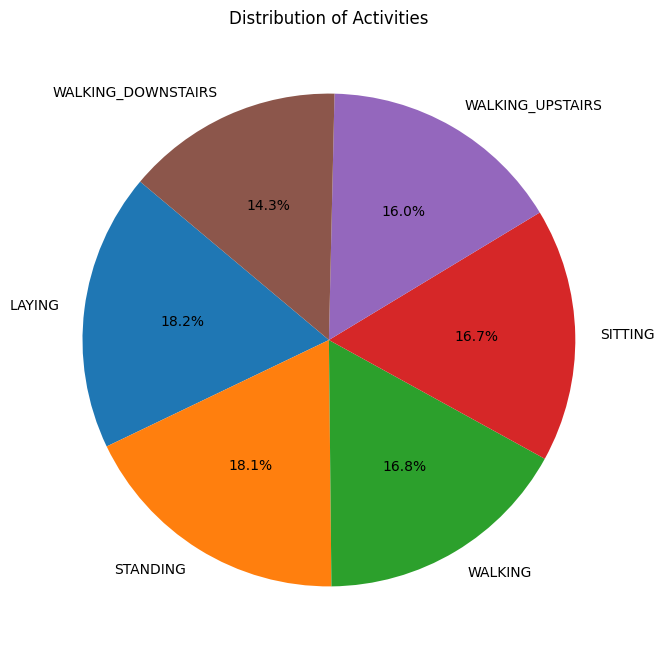

In [ ]:
# Mengetahui distribusi dari label
activity_counts = filtered_dataset['Activity'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Activities')
plt.show()

In [ ]:
features = filtered_dataset[selected_features[:-1]]
label = filtered_dataset['Activity']

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)

# One-hot encoding label
one_hot_encoded_label = pd.get_dummies(label, prefix='Activity')

In [9]:
final_dataset = pd.concat([normalized_features_df, one_hot_encoded_label], axis=1)
final_dataset.head()

,tGravityAcc-mean()-X,tGravityAcc-max()-X,tGravityAcc-min()-X,"angle(X,gravityMean)",tGravityAcc-energy()-X,tGravityAcc-max()-Y,"angle(Y,gravityMean)",tGravityAcc-mean()-Y,tGravityAcc-min()-Y,fBodyAccMag-mad(),...,fBodyAccMag-std(),"tGravityAcc-arCoeff()-Y,2",fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-iqr(),Activity_LAYING,Activity_SITTING,Activity_STANDING,Activity_WALKING,Activity_WALKING_DOWNSTAIRS,Activity_WALKING_UPSTAIRS
0,0.497065,0.562746,0.492422,-0.404790,0.519169,-0.659588,0.622723,-0.682787,-0.668792,-0.305468,...,-0.130599,1.516368,-0.681179,-0.708564,False,False,True,False,False,False
1,0.479322,0.464139,0.492422,-0.361739,0.484902,-0.726832,0.636731,-0.699252,-0.668792,-0.876041,...,-0.869217,1.355224,-0.802461,-0.809826,False,False,True,False,False,False
2,0.484226,0.464324,0.500861,-0.370932,0.494247,-0.726832,0.632845,-0.694937,-0.667520,-0.916271,...,-0.940618,-0.534165,-0.864170,-0.869516,False,False,True,False,False,False
3,0.482208,0.464324,0.498086,-0.363434,0.490398,-0.727438,0.645276,-0.709849,-0.696228,-0.915343,...,-0.935673,-0.508925,-0.865580,-0.875594,False,False,True,False,False,False
4,0.477752,0.459725,0.495922,-0.350256,0.481905,-0.746990,0.665657,-0.734093,-0.712230,-0.912684,...,-0.925926,0.449831,-0.903701,-0.902912,False,False,True,False,False,False


### b. Splitting dataset

In [ ]:
X = final_dataset.drop(columns=one_hot_encoded_label.columns)
y = final_dataset[one_hot_encoded_label.columns]

# Split dataset menjadi training, validation, dan test set (80:10:10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

total_samples = len(final_dataset)

print("Training set:", X_train.shape, y_train.shape, f"({len(X_train) / total_samples * 100:.2f}%)")
print("Validation set:", X_val.shape, y_val.shape, f"({len(X_val) / total_samples * 100:.2f}%)")
print("Test set:", X_test.shape, y_test.shape, f"({len(X_test) / total_samples * 100:.2f}%)")

Training set: (2357, 15) (2357, 6) (79.98%)
Validation set: (295, 15) (295, 6) (10.01%)
Test set: (295, 15) (295, 6) (10.01%)


### c. Arsitektur model

In [ ]:
# Define model
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=X_train.shape[1:]))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/kelvin/.conda/envs/tf-gpu2/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731030420.718096    1067 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731030421.093008    1067 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731030421.094034    1067 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731030421.100257    1067 cuda_executor.c

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,062 (707.27 KB)

 Trainable params: 181,062 (707.27 KB)

 Non-trainable params: 0 (0.00 B)

#### d. Training dengan 50 epoch dan plotting loss accuracy dan penjelasan

In [ ]:
# Training model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50


I0000 00:00:1731030424.334972    3891 service.cc:146] XLA service 0x7f9a40016960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731030424.335032    3891 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-11-08 08:47:04.387544: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-08 08:47:04.631939: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-08 08:47:12.340216: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_447', 36 bytes spill stores, 40 bytes spill loads

2024-11-08 08:47:13.396851: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory

 7/74 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1441 - loss: 1.8307

I0000 00:00:1731030443.177164    3891 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


68/74 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2169 - loss: 1.7581

2024-11-08 08:47:44.128776: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_447', 32 bytes spill stores, 32 bytes spill loads

2024-11-08 08:47:46.057273: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_449', 36 bytes spill stores, 40 bytes spill loads

2024-11-08 08:47:46.233737: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_447', 36 bytes spill stores, 40 bytes spill loads



74/74 ━━━━━━━━━━━━━━━━━━━━ 63s 585ms/step - accuracy: 0.2252 - loss: 1.7475 - val_accuracy: 0.5017 - val_loss: 1.2641
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5448 - loss: 1.0529 - val_accuracy: 0.6678 - val_loss: 0.8273
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6482 - loss: 0.7827 - val_accuracy: 0.5898 - val_loss: 0.7654
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6608 - loss: 0.7006 - val_accuracy: 0.6576 - val_loss: 0.6899
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7332 - loss: 0.6083 - val_accuracy: 0.7627 - val_loss: 0.6036
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7908 - loss: 0.5509 - val_accuracy: 0.8203 - val_loss: 0.5133
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8287 - loss: 0.4768 - val_accuracy: 0.8441 - val_loss: 0.4404
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8393 - loss: 0.4080 - val_accuracy: 0.8407 - val_loss: 0.39

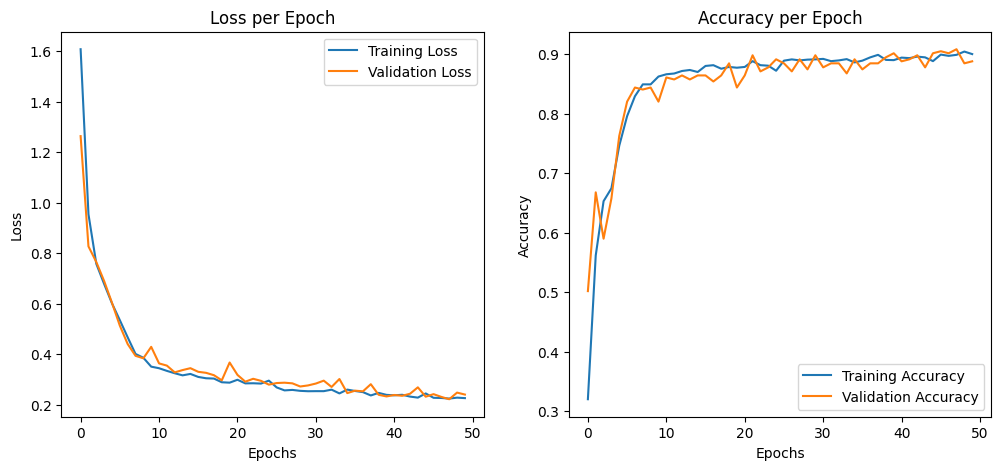

In [ ]:
# Plotting loss dan accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Berdasarkan plottingan grafik diatas, dapat diketahui bahwa model yang dihasilkan adalah right model karena terlihat bahwa model memiliki loss yang stabil dan rendah, serta accuracy yang diperoleh juga stabil dan tinggi yang menandakan bahwa model tidak underfitting. Antara training dan validation juga cukup seimbang yang menandakan bahwa model mampu generalisasi dengan baik terhadap data yang belum pernah dilihat sebelumnya dan tidak mengalami overfitting.

### e. Evaluation

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8750 - loss: 0.2530
Test Loss: 0.2507
Test Accuracy: 0.8746


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step


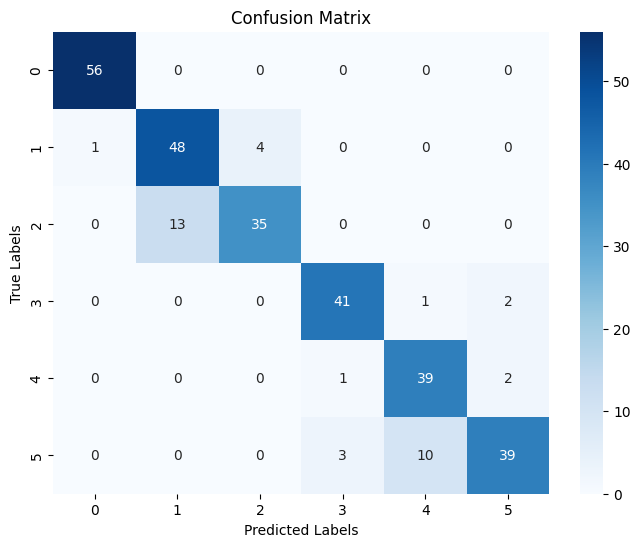

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       0.79      0.91      0.84        53
           2       0.90      0.73      0.80        48
           3       0.91      0.93      0.92        44
           4       0.78      0.93      0.85        42
           5       0.91      0.75      0.82        52

    accuracy                           0.87       295
   macro avg       0.88      0.87      0.87       295
weighted avg       0.88      0.87      0.87       295



In [ ]:
# Confusion matrix dan classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test.values, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_classes), yticklabels=np.unique(y_test_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(y_test_classes, y_pred_classes))

Diketahui bahwa model memiliki performa yang cukup baik secara keseluruhan dengan test accuracy yang tinggi. Terlihat juga bahwa performa untuk klasifikasi class 2 dan 5 masih perlu perbaikan karena masih banyak yang salah klasifikasi.